##**Classifying Clothes (Tensorflow)**

In [ ]:
!pip install -U tensorflow_datasets

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

In [ ]:
dataset, metadata = tfds.load("fashion_mnist", as_supervised= True, with_info = True)
train_dataset = dataset["train"]
test_dataset = dataset["test"]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.I78U5O_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.I78U5O_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
class_names = metadata.features["label"].names
data = []

for i in range(len(class_names)):
    class_name = class_names[i]
    data.append([i, class_name])

df = pd.DataFrame(data, columns=["Label", "Class Name"])
df

,Label,Class Name
0,0,T-shirt/top
1,1,Trouser
2,2,Pullover
3,3,Dress
4,4,Coat
5,5,Sandal
6,6,Shirt
7,7,Sneaker
8,8,Bag
9,9,Ankle boot


In [ ]:
num_training = metadata.splits["train"].num_examples
num_testing = metadata.splits["test"].num_examples
print("Number of training examples:", num_training)
print("Number of testing examples", num_testing)

Number of training examples: 60000
Number of testing examples 10000


In [ ]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images = images/255
  return images,labels
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

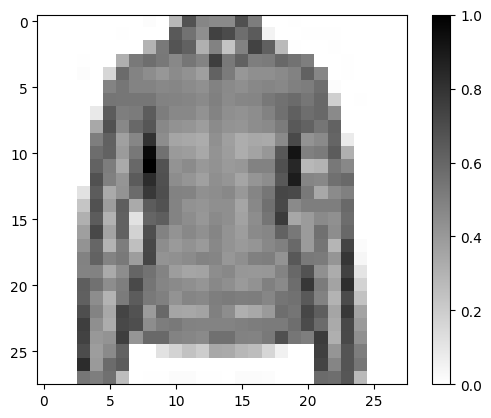

In [ ]:
for image, label in test_dataset.take(1):
  break
  image = image.numpy().reshape((28,28))
plt.figure()
plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"]
)

In [ ]:
Batch_size = 32
train_dataset = train_dataset.repeat().shuffle(num_training).batch(Batch_size)
test_dataset = test_dataset.batch(Batch_size)

In [ ]:
model.fit(train_dataset, epochs = 20 , steps_per_epoch = num_training//Batch_size)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7799 - loss: 0.6284
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8608 - loss: 0.3882
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8794 - loss: 0.3367
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8844 - loss: 0.3178
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8921 - loss: 0.2952
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8935 - loss: 0.2831
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8989 - loss: 0.2698
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9033 - loss: 0.2572
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9076 - loss: 0.2481
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9085 - loss: 0.2391
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9131 - loss: 0.2327
Epoch 12/20
1875/1875 ━

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps = (num_testing//32))
print("Accuracy: ", test_accuracy)

312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8858 - loss: 0.3656
Accuracy:  0.8857171535491943


In [ ]:
for image,label in test_dataset.take(1):
  image = image.numpy()
  label = label.numpy()
  predictions = model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [ ]:
predictions.shape

(32, 10)

In [ ]:
predictions[0]

array([1.2406385e-05, 7.8084405e-08, 9.4605265e-03, 1.8848155e-08,
       7.7649224e-01, 7.1690488e-12, 2.1403478e-01, 8.2642959e-09,
       8.8253678e-08, 4.0010031e-10], dtype=float32)

In [ ]:
np.argmax(predictions[0])

4

In [ ]:
label[0]

4

In [ ]:
def plot_image(i, predictions, true_labels, images):
    prediction = predictions[i]
    true_label = true_labels[i]
    img = images[i]

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[..., 0], cmap=plt.cm.binary)

    predicted_label = np.argmax(prediction)

    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    label_text = class_names[predicted_label] + " " + str(int(100 * np.max(prediction))) + "% (" + class_names[true_label] + ")"
    plt.xlabel(label_text, color=color)

def plot_value_array(i, predictions, true_labels):
    prediction = predictions[i]
    true_label = true_labels[i]

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    bars = plt.bar(range(10), prediction, color="#777777")
    plt.ylim([0, 1])

    predicted_label = np.argmax(prediction)
    bars[predicted_label].set_color('red')
    bars[true_label].set_color('blue')


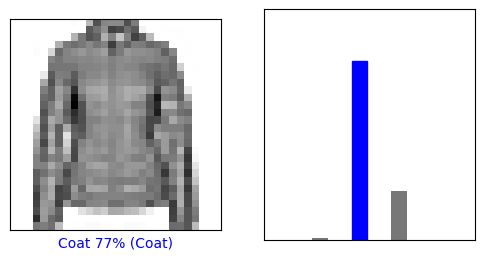

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, label, image)
plt.subplot(1,2,2)
plot_value_array(i, predictions, label)

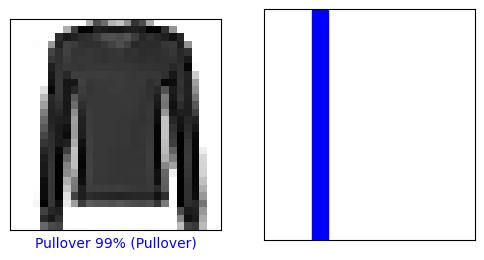

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, label, image)
plt.subplot(1,2,2)
plot_value_array(i, predictions, label)

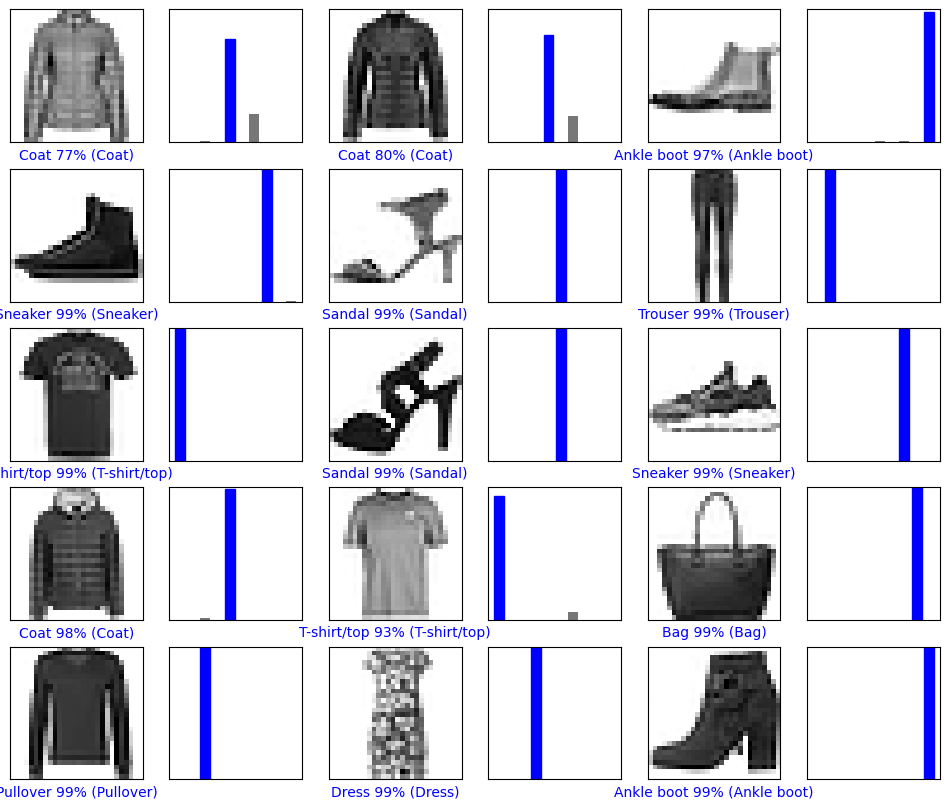

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, label, image)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, label)


In [ ]:

img = image[0]

print(img.shape)

(28, 28, 1)


In [ ]:
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[[1.2406378e-05 7.8084653e-08 9.4605125e-03 1.8848109e-08 7.7649176e-01
  7.1690587e-12 2.1403511e-01 8.2643066e-09 8.8253628e-08 4.0010001e-10]]


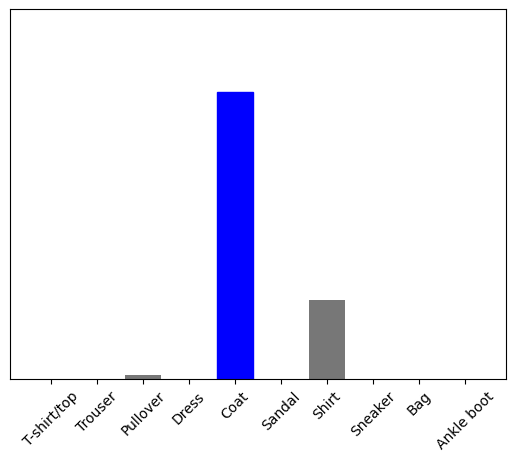

In [ ]:
plot_value_array(0, predictions_single, label)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

4